In [1]:
%load_ext tensorboard
%load_ext autoreload

%set_env CUDA_LAUNCH_BLOCKING=0

env: CUDA_LAUNCH_BLOCKING=0


In [2]:
%tensorboard --logdir lightning_logs

In [3]:
%autoreload 2

import torch
from torch.utils.data import TensorDataset
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_circles
import pytorch_lightning as lightning

from main import RectifyingFlow, SingleTensorDataset

In [4]:
plt.rc("figure", dpi=250)
plt.rc("legend", fontsize=6)

In [5]:
accelerator = "gpu"
devices = 1

In [6]:
torch.autograd.set_grad_enabled(False)

In [7]:
features, labels = make_moons(10000, shuffle=True, noise=0.05)
train_data = SingleTensorDataset(torch.tensor(features, dtype=torch.float32))
features, labels = make_moons(1000, shuffle=True, noise=0.05)
val_data = SingleTensorDataset(torch.tensor(features, dtype=torch.float32))

In [8]:
# features = np.random.standard_normal((1000, 2))
# train_data = SingleTensorDataset(torch.tensor(features, dtype=torch.float32))

# features = np.random.standard_normal((100, 2))
# val_data = SingleTensorDataset(torch.tensor(features, dtype=torch.float32))

In [9]:
hparams = dict(
    input_shape=(2,),
    batch_size=32,
    learning_rate=1e-3,
    weight_decay=0,
)

In [10]:
model = RectifyingFlow(train_data, val_data, test_data=None, **hparams)

In [11]:
trainer = lightning.Trainer(
    accelerator=accelerator,
    devices=devices,
    benchmark=True,
    max_epochs=100,
)

with torch.autograd.enable_grad():
    model.train()
    trainer.fit(model)

# best_model = model.load_from_checkpoint(trainer.checkpoint_callback.best_model_path)
# best_model.eval()

# model = best_model

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
The following callbacks returned in `LightningModule.configure_callbacks` will override existing callbacks passed to Trainer: ModelCheckpoint
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name | Type   | Params
--------------------------------
0 | net  | Subnet | 4.5 K 
--------------------------------
4.5 K     Trainable params
0         Non-trainable params
4.5 K     Total params
0.018     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

t[0, 0]=tensor(0.4542, device='cuda:0')
x0[0, 0]=tensor(-0.9817, device='cuda:0')
x1[0, 0]=tensor(1.3141, device='cuda:0')
xt[0, 0]=tensor(0.0610, device='cuda:0')
true[0, 0]=tensor(2.2958, device='cuda:0')
predicted[0, 0]=tensor(-0.0887, device='cuda:0')


Training: 0it [00:00, ?it/s]

t[0, 0]=tensor(0.6261, device='cuda:0')
x0[0, 0]=tensor(0.5489, device='cuda:0')
x1[0, 0]=tensor(-1.4925, device='cuda:0')
xt[0, 0]=tensor(-0.7292, device='cuda:0')
true[0, 0]=tensor(-2.0414, device='cuda:0')
predicted[0, 0]=tensor(-0.0956, device='cuda:0', grad_fn=<SelectBackward0>)


Validation: 0it [00:00, ?it/s]

t[0, 0]=tensor(0.5391, device='cuda:0')
x0[0, 0]=tensor(-0.9817, device='cuda:0')
x1[0, 0]=tensor(2.1633, device='cuda:0')
xt[0, 0]=tensor(0.7137, device='cuda:0')
true[0, 0]=tensor(3.1451, device='cuda:0')
predicted[0, 0]=tensor(-0.5189, device='cuda:0')
t[0, 0]=tensor(0.5827, device='cuda:0')
x0[0, 0]=tensor(1.6254, device='cuda:0')
x1[0, 0]=tensor(-0.0078, device='cuda:0')
xt[0, 0]=tensor(0.6737, device='cuda:0')
true[0, 0]=tensor(-1.6333, device='cuda:0')
predicted[0, 0]=tensor(-0.3714, device='cuda:0', grad_fn=<SelectBackward0>)


Validation: 0it [00:00, ?it/s]

t[0, 0]=tensor(0.2446, device='cuda:0')
x0[0, 0]=tensor(-0.9817, device='cuda:0')
x1[0, 0]=tensor(0.8371, device='cuda:0')
xt[0, 0]=tensor(-0.5369, device='cuda:0')
true[0, 0]=tensor(1.8189, device='cuda:0')
predicted[0, 0]=tensor(0.4020, device='cuda:0')
t[0, 0]=tensor(0.0943, device='cuda:0')
x0[0, 0]=tensor(1.3324, device='cuda:0')
x1[0, 0]=tensor(-0.6226, device='cuda:0')
xt[0, 0]=tensor(1.1481, device='cuda:0')
true[0, 0]=tensor(-1.9551, device='cuda:0')
predicted[0, 0]=tensor(-1.1182, device='cuda:0', grad_fn=<SelectBackward0>)


Validation: 0it [00:00, ?it/s]

t[0, 0]=tensor(0.3224, device='cuda:0')
x0[0, 0]=tensor(-0.9817, device='cuda:0')
x1[0, 0]=tensor(-0.9123, device='cuda:0')
xt[0, 0]=tensor(-0.9594, device='cuda:0')
true[0, 0]=tensor(0.0695, device='cuda:0')
predicted[0, 0]=tensor(-0.2877, device='cuda:0')
t[0, 0]=tensor(0.7639, device='cuda:0')
x0[0, 0]=tensor(-0.7114, device='cuda:0')
x1[0, 0]=tensor(2.0999, device='cuda:0')
xt[0, 0]=tensor(1.4360, device='cuda:0')
true[0, 0]=tensor(2.8113, device='cuda:0')
predicted[0, 0]=tensor(0.6319, device='cuda:0', grad_fn=<SelectBackward0>)


Validation: 0it [00:00, ?it/s]

t[0, 0]=tensor(0.4960, device='cuda:0')
x0[0, 0]=tensor(-0.9817, device='cuda:0')
x1[0, 0]=tensor(-1.3222, device='cuda:0')
xt[0, 0]=tensor(-1.1506, device='cuda:0')
true[0, 0]=tensor(-0.3404, device='cuda:0')
predicted[0, 0]=tensor(-1.1289, device='cuda:0')
t[0, 0]=tensor(0.8223, device='cuda:0')
x0[0, 0]=tensor(0.0231, device='cuda:0')
x1[0, 0]=tensor(-0.1491, device='cuda:0')
xt[0, 0]=tensor(-0.1185, device='cuda:0')
true[0, 0]=tensor(-0.1721, device='cuda:0')
predicted[0, 0]=tensor(-0.7995, device='cuda:0', grad_fn=<SelectBackward0>)


Validation: 0it [00:00, ?it/s]

t[0, 0]=tensor(0.3094, device='cuda:0')
x0[0, 0]=tensor(-0.9817, device='cuda:0')
x1[0, 0]=tensor(0.4255, device='cuda:0')
xt[0, 0]=tensor(-0.5464, device='cuda:0')
true[0, 0]=tensor(1.4072, device='cuda:0')
predicted[0, 0]=tensor(-0.3400, device='cuda:0')
t[0, 0]=tensor(0.9779, device='cuda:0')
x0[0, 0]=tensor(-0.4357, device='cuda:0')
x1[0, 0]=tensor(0.9541, device='cuda:0')
xt[0, 0]=tensor(0.9234, device='cuda:0')
true[0, 0]=tensor(1.3898, device='cuda:0')
predicted[0, 0]=tensor(0.1345, device='cuda:0', grad_fn=<SelectBackward0>)


Validation: 0it [00:00, ?it/s]

t[0, 0]=tensor(0.1389, device='cuda:0')
x0[0, 0]=tensor(-0.9817, device='cuda:0')
x1[0, 0]=tensor(-1.2143, device='cuda:0')
xt[0, 0]=tensor(-1.0141, device='cuda:0')
true[0, 0]=tensor(-0.2326, device='cuda:0')
predicted[0, 0]=tensor(0.6556, device='cuda:0')
t[0, 0]=tensor(0.9355, device='cuda:0')
x0[0, 0]=tensor(-0.7332, device='cuda:0')
x1[0, 0]=tensor(0.2865, device='cuda:0')
xt[0, 0]=tensor(0.2208, device='cuda:0')
true[0, 0]=tensor(1.0198, device='cuda:0')
predicted[0, 0]=tensor(-0.2600, device='cuda:0', grad_fn=<SelectBackward0>)


Validation: 0it [00:00, ?it/s]

t[0, 0]=tensor(0.4610, device='cuda:0')
x0[0, 0]=tensor(-0.9817, device='cuda:0')
x1[0, 0]=tensor(-1.4454, device='cuda:0')
xt[0, 0]=tensor(-1.1955, device='cuda:0')
true[0, 0]=tensor(-0.4637, device='cuda:0')
predicted[0, 0]=tensor(-1.1000, device='cuda:0')
t[0, 0]=tensor(0.2648, device='cuda:0')
x0[0, 0]=tensor(-0.7840, device='cuda:0')
x1[0, 0]=tensor(1.6118, device='cuda:0')
xt[0, 0]=tensor(-0.1496, device='cuda:0')
true[0, 0]=tensor(2.3957, device='cuda:0')
predicted[0, 0]=tensor(0.1629, device='cuda:0', grad_fn=<SelectBackward0>)


Validation: 0it [00:00, ?it/s]

t[0, 0]=tensor(0.8125, device='cuda:0')
x0[0, 0]=tensor(-0.9817, device='cuda:0')
x1[0, 0]=tensor(1.1549, device='cuda:0')
xt[0, 0]=tensor(0.7542, device='cuda:0')
true[0, 0]=tensor(2.1366, device='cuda:0')
predicted[0, 0]=tensor(0.1169, device='cuda:0')
t[0, 0]=tensor(0.8888, device='cuda:0')
x0[0, 0]=tensor(1.5585, device='cuda:0')
x1[0, 0]=tensor(1.2617, device='cuda:0')
xt[0, 0]=tensor(1.2946, device='cuda:0')
true[0, 0]=tensor(-0.2968, device='cuda:0')
predicted[0, 0]=tensor(0.8584, device='cuda:0', grad_fn=<SelectBackward0>)


Validation: 0it [00:00, ?it/s]

t[0, 0]=tensor(0.4870, device='cuda:0')
x0[0, 0]=tensor(-0.9817, device='cuda:0')
x1[0, 0]=tensor(-0.4395, device='cuda:0')
xt[0, 0]=tensor(-0.7177, device='cuda:0')
true[0, 0]=tensor(0.5423, device='cuda:0')
predicted[0, 0]=tensor(-0.9260, device='cuda:0')
t[0, 0]=tensor(0.0505, device='cuda:0')
x0[0, 0]=tensor(0.3537, device='cuda:0')
x1[0, 0]=tensor(-0.4555, device='cuda:0')
xt[0, 0]=tensor(0.3129, device='cuda:0')
true[0, 0]=tensor(-0.8092, device='cuda:0')
predicted[0, 0]=tensor(-0.1938, device='cuda:0', grad_fn=<SelectBackward0>)


Validation: 0it [00:00, ?it/s]

t[0, 0]=tensor(0.7317, device='cuda:0')
x0[0, 0]=tensor(-0.9817, device='cuda:0')
x1[0, 0]=tensor(-0.9751, device='cuda:0')
xt[0, 0]=tensor(-0.9769, device='cuda:0')
true[0, 0]=tensor(0.0066, device='cuda:0')
predicted[0, 0]=tensor(-1.3601, device='cuda:0')
t[0, 0]=tensor(0.0987, device='cuda:0')
x0[0, 0]=tensor(0.1058, device='cuda:0')
x1[0, 0]=tensor(1.7866, device='cuda:0')
xt[0, 0]=tensor(0.2717, device='cuda:0')
true[0, 0]=tensor(1.6808, device='cuda:0')
predicted[0, 0]=tensor(-0.3906, device='cuda:0', grad_fn=<SelectBackward0>)


Validation: 0it [00:00, ?it/s]

t[0, 0]=tensor(0.5069, device='cuda:0')
x0[0, 0]=tensor(-0.9817, device='cuda:0')
x1[0, 0]=tensor(0.0617, device='cuda:0')
xt[0, 0]=tensor(-0.4528, device='cuda:0')
true[0, 0]=tensor(1.0434, device='cuda:0')
predicted[0, 0]=tensor(-0.5806, device='cuda:0')
t[0, 0]=tensor(0.2134, device='cuda:0')
x0[0, 0]=tensor(0.2041, device='cuda:0')
x1[0, 0]=tensor(-0.4834, device='cuda:0')
xt[0, 0]=tensor(0.0574, device='cuda:0')
true[0, 0]=tensor(-0.6875, device='cuda:0')
predicted[0, 0]=tensor(-0.1783, device='cuda:0', grad_fn=<SelectBackward0>)


Validation: 0it [00:00, ?it/s]

t[0, 0]=tensor(0.0481, device='cuda:0')
x0[0, 0]=tensor(-0.9817, device='cuda:0')
x1[0, 0]=tensor(-0.6307, device='cuda:0')
xt[0, 0]=tensor(-0.9649, device='cuda:0')
true[0, 0]=tensor(0.3511, device='cuda:0')
predicted[0, 0]=tensor(0.8319, device='cuda:0')
t[0, 0]=tensor(0.0767, device='cuda:0')
x0[0, 0]=tensor(0.6235, device='cuda:0')
x1[0, 0]=tensor(-2.2122, device='cuda:0')
xt[0, 0]=tensor(0.4059, device='cuda:0')
true[0, 0]=tensor(-2.8357, device='cuda:0')
predicted[0, 0]=tensor(-0.2415, device='cuda:0', grad_fn=<SelectBackward0>)


Validation: 0it [00:00, ?it/s]

t[0, 0]=tensor(0.1095, device='cuda:0')
x0[0, 0]=tensor(-0.9817, device='cuda:0')
x1[0, 0]=tensor(0.2836, device='cuda:0')
xt[0, 0]=tensor(-0.8433, device='cuda:0')
true[0, 0]=tensor(1.2653, device='cuda:0')
predicted[0, 0]=tensor(0.9023, device='cuda:0')
t[0, 0]=tensor(0.9426, device='cuda:0')
x0[0, 0]=tensor(0.6499, device='cuda:0')
x1[0, 0]=tensor(-0.7775, device='cuda:0')
xt[0, 0]=tensor(-0.6956, device='cuda:0')
true[0, 0]=tensor(-1.4274, device='cuda:0')
predicted[0, 0]=tensor(-1.3399, device='cuda:0', grad_fn=<SelectBackward0>)


Validation: 0it [00:00, ?it/s]

t[0, 0]=tensor(0.3343, device='cuda:0')
x0[0, 0]=tensor(-0.9817, device='cuda:0')
x1[0, 0]=tensor(0.7770, device='cuda:0')
xt[0, 0]=tensor(-0.3938, device='cuda:0')
true[0, 0]=tensor(1.7588, device='cuda:0')
predicted[0, 0]=tensor(0.3749, device='cuda:0')
t[0, 0]=tensor(0.0141, device='cuda:0')
x0[0, 0]=tensor(-0.7564, device='cuda:0')
x1[0, 0]=tensor(0.4038, device='cuda:0')
xt[0, 0]=tensor(-0.7400, device='cuda:0')
true[0, 0]=tensor(1.1601, device='cuda:0')
predicted[0, 0]=tensor(0.5534, device='cuda:0', grad_fn=<SelectBackward0>)


Validation: 0it [00:00, ?it/s]

t[0, 0]=tensor(0.1565, device='cuda:0')
x0[0, 0]=tensor(-0.9817, device='cuda:0')
x1[0, 0]=tensor(1.5809, device='cuda:0')
xt[0, 0]=tensor(-0.5806, device='cuda:0')
true[0, 0]=tensor(2.5626, device='cuda:0')
predicted[0, 0]=tensor(1.3783, device='cuda:0')
t[0, 0]=tensor(0.6186, device='cuda:0')
x0[0, 0]=tensor(1.9094, device='cuda:0')
x1[0, 0]=tensor(-1.5343, device='cuda:0')
xt[0, 0]=tensor(-0.2209, device='cuda:0')
true[0, 0]=tensor(-3.4436, device='cuda:0')
predicted[0, 0]=tensor(-0.3816, device='cuda:0', grad_fn=<SelectBackward0>)


Validation: 0it [00:00, ?it/s]

t[0, 0]=tensor(0.0772, device='cuda:0')
x0[0, 0]=tensor(-0.9817, device='cuda:0')
x1[0, 0]=tensor(-0.1840, device='cuda:0')
xt[0, 0]=tensor(-0.9202, device='cuda:0')
true[0, 0]=tensor(0.7977, device='cuda:0')
predicted[0, 0]=tensor(0.9989, device='cuda:0')
t[0, 0]=tensor(0.1787, device='cuda:0')
x0[0, 0]=tensor(-0.6053, device='cuda:0')
x1[0, 0]=tensor(0.5408, device='cuda:0')
xt[0, 0]=tensor(-0.4005, device='cuda:0')
true[0, 0]=tensor(1.1461, device='cuda:0')
predicted[0, 0]=tensor(0.7924, device='cuda:0', grad_fn=<SelectBackward0>)


Validation: 0it [00:00, ?it/s]

t[0, 0]=tensor(0.5836, device='cuda:0')
x0[0, 0]=tensor(-0.9817, device='cuda:0')
x1[0, 0]=tensor(-0.7555, device='cuda:0')
xt[0, 0]=tensor(-0.8497, device='cuda:0')
true[0, 0]=tensor(0.2262, device='cuda:0')
predicted[0, 0]=tensor(-1.0664, device='cuda:0')
t[0, 0]=tensor(0.2462, device='cuda:0')
x0[0, 0]=tensor(0.9021, device='cuda:0')
x1[0, 0]=tensor(-0.2592, device='cuda:0')
xt[0, 0]=tensor(0.6162, device='cuda:0')
true[0, 0]=tensor(-1.1613, device='cuda:0')
predicted[0, 0]=tensor(-0.4311, device='cuda:0', grad_fn=<SelectBackward0>)


Validation: 0it [00:00, ?it/s]

t[0, 0]=tensor(0.0327, device='cuda:0')
x0[0, 0]=tensor(-0.9817, device='cuda:0')
x1[0, 0]=tensor(0.9924, device='cuda:0')
xt[0, 0]=tensor(-0.9173, device='cuda:0')
true[0, 0]=tensor(1.9741, device='cuda:0')
predicted[0, 0]=tensor(1.0868, device='cuda:0')
t[0, 0]=tensor(0.1498, device='cuda:0')
x0[0, 0]=tensor(-0.9475, device='cuda:0')
x1[0, 0]=tensor(1.4465, device='cuda:0')
xt[0, 0]=tensor(-0.5888, device='cuda:0')
true[0, 0]=tensor(2.3940, device='cuda:0')
predicted[0, 0]=tensor(1.0051, device='cuda:0', grad_fn=<SelectBackward0>)


Validation: 0it [00:00, ?it/s]

t[0, 0]=tensor(0.2608, device='cuda:0')
x0[0, 0]=tensor(-0.9817, device='cuda:0')
x1[0, 0]=tensor(-0.0085, device='cuda:0')
xt[0, 0]=tensor(-0.7279, device='cuda:0')
true[0, 0]=tensor(0.9733, device='cuda:0')
predicted[0, 0]=tensor(0.7232, device='cuda:0')
t[0, 0]=tensor(0.9762, device='cuda:0')
x0[0, 0]=tensor(-0.7259, device='cuda:0')
x1[0, 0]=tensor(0.5452, device='cuda:0')
xt[0, 0]=tensor(0.5149, device='cuda:0')
true[0, 0]=tensor(1.2711, device='cuda:0')
predicted[0, 0]=tensor(0.0275, device='cuda:0', grad_fn=<SelectBackward0>)


Validation: 0it [00:00, ?it/s]

t[0, 0]=tensor(0.5048, device='cuda:0')
x0[0, 0]=tensor(-0.9817, device='cuda:0')
x1[0, 0]=tensor(-0.3154, device='cuda:0')
xt[0, 0]=tensor(-0.6454, device='cuda:0')
true[0, 0]=tensor(0.6663, device='cuda:0')
predicted[0, 0]=tensor(-0.6376, device='cuda:0')
t[0, 0]=tensor(0.2610, device='cuda:0')
x0[0, 0]=tensor(0.8220, device='cuda:0')
x1[0, 0]=tensor(0.2213, device='cuda:0')
xt[0, 0]=tensor(0.6652, device='cuda:0')
true[0, 0]=tensor(-0.6008, device='cuda:0')
predicted[0, 0]=tensor(-0.6552, device='cuda:0', grad_fn=<SelectBackward0>)


Validation: 0it [00:00, ?it/s]

t[0, 0]=tensor(0.7927, device='cuda:0')
x0[0, 0]=tensor(-0.9817, device='cuda:0')
x1[0, 0]=tensor(-0.9648, device='cuda:0')
xt[0, 0]=tensor(-0.9683, device='cuda:0')
true[0, 0]=tensor(0.0169, device='cuda:0')
predicted[0, 0]=tensor(-1.4655, device='cuda:0')
t[0, 0]=tensor(0.2732, device='cuda:0')
x0[0, 0]=tensor(0.0174, device='cuda:0')
x1[0, 0]=tensor(-1.8909, device='cuda:0')
xt[0, 0]=tensor(-0.5039, device='cuda:0')
true[0, 0]=tensor(-1.9083, device='cuda:0')
predicted[0, 0]=tensor(0.5517, device='cuda:0', grad_fn=<SelectBackward0>)


Validation: 0it [00:00, ?it/s]

t[0, 0]=tensor(0.0663, device='cuda:0')
x0[0, 0]=tensor(-0.9817, device='cuda:0')
x1[0, 0]=tensor(-0.2962, device='cuda:0')
xt[0, 0]=tensor(-0.9363, device='cuda:0')
true[0, 0]=tensor(0.6855, device='cuda:0')
predicted[0, 0]=tensor(0.9259, device='cuda:0')
t[0, 0]=tensor(0.2900, device='cuda:0')
x0[0, 0]=tensor(0.0589, device='cuda:0')
x1[0, 0]=tensor(1.2845, device='cuda:0')
xt[0, 0]=tensor(0.4142, device='cuda:0')
true[0, 0]=tensor(1.2257, device='cuda:0')
predicted[0, 0]=tensor(-0.5030, device='cuda:0', grad_fn=<SelectBackward0>)


Validation: 0it [00:00, ?it/s]

t[0, 0]=tensor(0.8242, device='cuda:0')
x0[0, 0]=tensor(-0.9817, device='cuda:0')
x1[0, 0]=tensor(0.3082, device='cuda:0')
xt[0, 0]=tensor(0.0814, device='cuda:0')
true[0, 0]=tensor(1.2899, device='cuda:0')
predicted[0, 0]=tensor(-0.4712, device='cuda:0')
t[0, 0]=tensor(0.4272, device='cuda:0')
x0[0, 0]=tensor(-0.4758, device='cuda:0')
x1[0, 0]=tensor(-0.1433, device='cuda:0')
xt[0, 0]=tensor(-0.3338, device='cuda:0')
true[0, 0]=tensor(0.3325, device='cuda:0')
predicted[0, 0]=tensor(-0.3389, device='cuda:0', grad_fn=<SelectBackward0>)


Validation: 0it [00:00, ?it/s]

t[0, 0]=tensor(0.7601, device='cuda:0')
x0[0, 0]=tensor(-0.9817, device='cuda:0')
x1[0, 0]=tensor(-0.0492, device='cuda:0')
xt[0, 0]=tensor(-0.2729, device='cuda:0')
true[0, 0]=tensor(0.9326, device='cuda:0')
predicted[0, 0]=tensor(-0.5468, device='cuda:0')
t[0, 0]=tensor(0.9678, device='cuda:0')
x0[0, 0]=tensor(1.6536, device='cuda:0')
x1[0, 0]=tensor(0.8358, device='cuda:0')
xt[0, 0]=tensor(0.8621, device='cuda:0')
true[0, 0]=tensor(-0.8178, device='cuda:0')
predicted[0, 0]=tensor(0.2700, device='cuda:0', grad_fn=<SelectBackward0>)


Validation: 0it [00:00, ?it/s]

t[0, 0]=tensor(0.7473, device='cuda:0')
x0[0, 0]=tensor(-0.9817, device='cuda:0')
x1[0, 0]=tensor(-1.3799, device='cuda:0')
xt[0, 0]=tensor(-1.2793, device='cuda:0')
true[0, 0]=tensor(-0.3982, device='cuda:0')
predicted[0, 0]=tensor(-1.5617, device='cuda:0')
t[0, 0]=tensor(0.4306, device='cuda:0')
x0[0, 0]=tensor(1.8599, device='cuda:0')
x1[0, 0]=tensor(0.1565, device='cuda:0')
xt[0, 0]=tensor(1.1264, device='cuda:0')
true[0, 0]=tensor(-1.7034, device='cuda:0')
predicted[0, 0]=tensor(-0.5173, device='cuda:0', grad_fn=<SelectBackward0>)


Validation: 0it [00:00, ?it/s]

t[0, 0]=tensor(0.8458, device='cuda:0')
x0[0, 0]=tensor(-0.9817, device='cuda:0')
x1[0, 0]=tensor(-1.0328, device='cuda:0')
xt[0, 0]=tensor(-1.0249, device='cuda:0')
true[0, 0]=tensor(-0.0510, device='cuda:0')
predicted[0, 0]=tensor(-1.6329, device='cuda:0')
t[0, 0]=tensor(0.3389, device='cuda:0')
x0[0, 0]=tensor(1.9109, device='cuda:0')
x1[0, 0]=tensor(-0.5512, device='cuda:0')
xt[0, 0]=tensor(1.0766, device='cuda:0')
true[0, 0]=tensor(-2.4621, device='cuda:0')
predicted[0, 0]=tensor(-1.2092, device='cuda:0', grad_fn=<SelectBackward0>)


Validation: 0it [00:00, ?it/s]

t[0, 0]=tensor(0.9649, device='cuda:0')
x0[0, 0]=tensor(-0.9817, device='cuda:0')
x1[0, 0]=tensor(-0.7106, device='cuda:0')
xt[0, 0]=tensor(-0.7201, device='cuda:0')
true[0, 0]=tensor(0.2711, device='cuda:0')
predicted[0, 0]=tensor(-1.2090, device='cuda:0')
t[0, 0]=tensor(0.9438, device='cuda:0')
x0[0, 0]=tensor(0.6649, device='cuda:0')
x1[0, 0]=tensor(-0.9831, device='cuda:0')
xt[0, 0]=tensor(-0.8906, device='cuda:0')
true[0, 0]=tensor(-1.6481, device='cuda:0')
predicted[0, 0]=tensor(-1.4484, device='cuda:0', grad_fn=<SelectBackward0>)


Validation: 0it [00:00, ?it/s]

t[0, 0]=tensor(0.4292, device='cuda:0')
x0[0, 0]=tensor(-0.9817, device='cuda:0')
x1[0, 0]=tensor(-1.0995, device='cuda:0')
xt[0, 0]=tensor(-1.0323, device='cuda:0')
true[0, 0]=tensor(-0.1177, device='cuda:0')
predicted[0, 0]=tensor(-1.0669, device='cuda:0')
t[0, 0]=tensor(0.0741, device='cuda:0')
x0[0, 0]=tensor(0.4731, device='cuda:0')
x1[0, 0]=tensor(0.1975, device='cuda:0')
xt[0, 0]=tensor(0.4527, device='cuda:0')
true[0, 0]=tensor(-0.2756, device='cuda:0')
predicted[0, 0]=tensor(-0.3650, device='cuda:0', grad_fn=<SelectBackward0>)


Validation: 0it [00:00, ?it/s]

t[0, 0]=tensor(0.5072, device='cuda:0')
x0[0, 0]=tensor(-0.9817, device='cuda:0')
x1[0, 0]=tensor(1.1843, device='cuda:0')
xt[0, 0]=tensor(0.1168, device='cuda:0')
true[0, 0]=tensor(2.1660, device='cuda:0')
predicted[0, 0]=tensor(-0.7040, device='cuda:0')
t[0, 0]=tensor(0.9977, device='cuda:0')
x0[0, 0]=tensor(0.4438, device='cuda:0')
x1[0, 0]=tensor(-0.0101, device='cuda:0')
xt[0, 0]=tensor(-0.0090, device='cuda:0')
true[0, 0]=tensor(-0.4539, device='cuda:0')
predicted[0, 0]=tensor(-0.4465, device='cuda:0', grad_fn=<SelectBackward0>)


Validation: 0it [00:00, ?it/s]

t[0, 0]=tensor(0.0977, device='cuda:0')
x0[0, 0]=tensor(-0.9817, device='cuda:0')
x1[0, 0]=tensor(-0.8410, device='cuda:0')
xt[0, 0]=tensor(-0.9680, device='cuda:0')
true[0, 0]=tensor(0.1407, device='cuda:0')
predicted[0, 0]=tensor(0.8452, device='cuda:0')
t[0, 0]=tensor(0.8777, device='cuda:0')
x0[0, 0]=tensor(0.2926, device='cuda:0')
x1[0, 0]=tensor(-0.6646, device='cuda:0')
xt[0, 0]=tensor(-0.5475, device='cuda:0')
true[0, 0]=tensor(-0.9572, device='cuda:0')
predicted[0, 0]=tensor(-1.0863, device='cuda:0', grad_fn=<SelectBackward0>)


Validation: 0it [00:00, ?it/s]

t[0, 0]=tensor(0.3983, device='cuda:0')
x0[0, 0]=tensor(-0.9817, device='cuda:0')
x1[0, 0]=tensor(0.7376, device='cuda:0')
xt[0, 0]=tensor(-0.2970, device='cuda:0')
true[0, 0]=tensor(1.7194, device='cuda:0')
predicted[0, 0]=tensor(-0.1352, device='cuda:0')
t[0, 0]=tensor(0.4566, device='cuda:0')
x0[0, 0]=tensor(1.1855, device='cuda:0')
x1[0, 0]=tensor(0.3340, device='cuda:0')
xt[0, 0]=tensor(0.7967, device='cuda:0')
true[0, 0]=tensor(-0.8516, device='cuda:0')
predicted[0, 0]=tensor(-0.7172, device='cuda:0', grad_fn=<SelectBackward0>)


Validation: 0it [00:00, ?it/s]

t[0, 0]=tensor(0.6764, device='cuda:0')
x0[0, 0]=tensor(-0.9817, device='cuda:0')
x1[0, 0]=tensor(-0.7740, device='cuda:0')
xt[0, 0]=tensor(-0.8413, device='cuda:0')
true[0, 0]=tensor(0.2077, device='cuda:0')
predicted[0, 0]=tensor(-1.0915, device='cuda:0')
t[0, 0]=tensor(0.8043, device='cuda:0')
x0[0, 0]=tensor(-0.7207, device='cuda:0')
x1[0, 0]=tensor(-0.9244, device='cuda:0')
xt[0, 0]=tensor(-0.8845, device='cuda:0')
true[0, 0]=tensor(-0.2037, device='cuda:0')
predicted[0, 0]=tensor(-1.1602, device='cuda:0', grad_fn=<SelectBackward0>)


Validation: 0it [00:00, ?it/s]

t[0, 0]=tensor(0.2999, device='cuda:0')
x0[0, 0]=tensor(-0.9817, device='cuda:0')
x1[0, 0]=tensor(0.5160, device='cuda:0')
xt[0, 0]=tensor(-0.5326, device='cuda:0')
true[0, 0]=tensor(1.4977, device='cuda:0')
predicted[0, 0]=tensor(0.3534, device='cuda:0')
t[0, 0]=tensor(0.3885, device='cuda:0')
x0[0, 0]=tensor(-0.0507, device='cuda:0')
x1[0, 0]=tensor(-0.0288, device='cuda:0')
xt[0, 0]=tensor(-0.0422, device='cuda:0')
true[0, 0]=tensor(0.0219, device='cuda:0')
predicted[0, 0]=tensor(0.0763, device='cuda:0', grad_fn=<SelectBackward0>)


Validation: 0it [00:00, ?it/s]

t[0, 0]=tensor(0.5431, device='cuda:0')
x0[0, 0]=tensor(-0.9817, device='cuda:0')
x1[0, 0]=tensor(0.0410, device='cuda:0')
xt[0, 0]=tensor(-0.4263, device='cuda:0')
true[0, 0]=tensor(1.0227, device='cuda:0')
predicted[0, 0]=tensor(-0.8146, device='cuda:0')
t[0, 0]=tensor(0.6833, device='cuda:0')
x0[0, 0]=tensor(0.2955, device='cuda:0')
x1[0, 0]=tensor(0.4823, device='cuda:0')
xt[0, 0]=tensor(0.4231, device='cuda:0')
true[0, 0]=tensor(0.1868, device='cuda:0')
predicted[0, 0]=tensor(-0.3219, device='cuda:0', grad_fn=<SelectBackward0>)


Validation: 0it [00:00, ?it/s]

t[0, 0]=tensor(0.7623, device='cuda:0')
x0[0, 0]=tensor(-0.9817, device='cuda:0')
x1[0, 0]=tensor(2.2869, device='cuda:0')
xt[0, 0]=tensor(1.5098, device='cuda:0')
true[0, 0]=tensor(3.2687, device='cuda:0')
predicted[0, 0]=tensor(0.7941, device='cuda:0')
t[0, 0]=tensor(0.0805, device='cuda:0')
x0[0, 0]=tensor(0.4786, device='cuda:0')
x1[0, 0]=tensor(0.9575, device='cuda:0')
xt[0, 0]=tensor(0.5172, device='cuda:0')
true[0, 0]=tensor(0.4789, device='cuda:0')
predicted[0, 0]=tensor(-0.5905, device='cuda:0', grad_fn=<SelectBackward0>)


Validation: 0it [00:00, ?it/s]

t[0, 0]=tensor(0.9433, device='cuda:0')
x0[0, 0]=tensor(-0.9817, device='cuda:0')
x1[0, 0]=tensor(-2.1023, device='cuda:0')
xt[0, 0]=tensor(-2.0387, device='cuda:0')
true[0, 0]=tensor(-1.1206, device='cuda:0')
predicted[0, 0]=tensor(-2.7816, device='cuda:0')
t[0, 0]=tensor(0.9838, device='cuda:0')
x0[0, 0]=tensor(1.7788, device='cuda:0')
x1[0, 0]=tensor(-0.3893, device='cuda:0')
xt[0, 0]=tensor(-0.3541, device='cuda:0')
true[0, 0]=tensor(-2.1681, device='cuda:0')
predicted[0, 0]=tensor(-1.0263, device='cuda:0', grad_fn=<SelectBackward0>)


Validation: 0it [00:00, ?it/s]

t[0, 0]=tensor(0.0292, device='cuda:0')
x0[0, 0]=tensor(-0.9817, device='cuda:0')
x1[0, 0]=tensor(-0.6911, device='cuda:0')
xt[0, 0]=tensor(-0.9733, device='cuda:0')
true[0, 0]=tensor(0.2907, device='cuda:0')
predicted[0, 0]=tensor(0.9707, device='cuda:0')
t[0, 0]=tensor(0.3785, device='cuda:0')
x0[0, 0]=tensor(1.5767, device='cuda:0')
x1[0, 0]=tensor(0.7101, device='cuda:0')
xt[0, 0]=tensor(1.2487, device='cuda:0')
true[0, 0]=tensor(-0.8666, device='cuda:0')
predicted[0, 0]=tensor(-0.4784, device='cuda:0', grad_fn=<SelectBackward0>)


Validation: 0it [00:00, ?it/s]

t[0, 0]=tensor(0.5777, device='cuda:0')
x0[0, 0]=tensor(-0.9817, device='cuda:0')
x1[0, 0]=tensor(-1.1526, device='cuda:0')
xt[0, 0]=tensor(-1.0805, device='cuda:0')
true[0, 0]=tensor(-0.1709, device='cuda:0')
predicted[0, 0]=tensor(-1.1622, device='cuda:0')
t[0, 0]=tensor(0.6283, device='cuda:0')
x0[0, 0]=tensor(-0.7099, device='cuda:0')
x1[0, 0]=tensor(1.0515, device='cuda:0')
xt[0, 0]=tensor(0.3968, device='cuda:0')
true[0, 0]=tensor(1.7614, device='cuda:0')
predicted[0, 0]=tensor(-0.3192, device='cuda:0', grad_fn=<SelectBackward0>)


Validation: 0it [00:00, ?it/s]

t[0, 0]=tensor(0.1986, device='cuda:0')
x0[0, 0]=tensor(-0.9817, device='cuda:0')
x1[0, 0]=tensor(-1.2260, device='cuda:0')
xt[0, 0]=tensor(-1.0302, device='cuda:0')
true[0, 0]=tensor(-0.2442, device='cuda:0')
predicted[0, 0]=tensor(-0.1498, device='cuda:0')
t[0, 0]=tensor(0.8891, device='cuda:0')
x0[0, 0]=tensor(-0.9344, device='cuda:0')
x1[0, 0]=tensor(-0.0983, device='cuda:0')
xt[0, 0]=tensor(-0.1910, device='cuda:0')
true[0, 0]=tensor(0.8361, device='cuda:0')
predicted[0, 0]=tensor(-0.7781, device='cuda:0', grad_fn=<SelectBackward0>)


Validation: 0it [00:00, ?it/s]

t[0, 0]=tensor(0.4955, device='cuda:0')
x0[0, 0]=tensor(-0.9817, device='cuda:0')
x1[0, 0]=tensor(0.0981, device='cuda:0')
xt[0, 0]=tensor(-0.4467, device='cuda:0')
true[0, 0]=tensor(1.0799, device='cuda:0')
predicted[0, 0]=tensor(-0.5453, device='cuda:0')
t[0, 0]=tensor(0.9402, device='cuda:0')
x0[0, 0]=tensor(-0.4618, device='cuda:0')
x1[0, 0]=tensor(0.1939, device='cuda:0')
xt[0, 0]=tensor(0.1547, device='cuda:0')
true[0, 0]=tensor(0.6556, device='cuda:0')
predicted[0, 0]=tensor(-0.2540, device='cuda:0', grad_fn=<SelectBackward0>)


Validation: 0it [00:00, ?it/s]

t[0, 0]=tensor(0.6650, device='cuda:0')
x0[0, 0]=tensor(-0.9817, device='cuda:0')
x1[0, 0]=tensor(0.8572, device='cuda:0')
xt[0, 0]=tensor(0.2413, device='cuda:0')
true[0, 0]=tensor(1.8390, device='cuda:0')
predicted[0, 0]=tensor(-0.6963, device='cuda:0')
t[0, 0]=tensor(0.2852, device='cuda:0')
x0[0, 0]=tensor(-0.8539, device='cuda:0')
x1[0, 0]=tensor(0.5765, device='cuda:0')
xt[0, 0]=tensor(-0.4460, device='cuda:0')
true[0, 0]=tensor(1.4304, device='cuda:0')
predicted[0, 0]=tensor(0.4280, device='cuda:0', grad_fn=<SelectBackward0>)


Validation: 0it [00:00, ?it/s]

t[0, 0]=tensor(0.1408, device='cuda:0')
x0[0, 0]=tensor(-0.9817, device='cuda:0')
x1[0, 0]=tensor(0.5307, device='cuda:0')
xt[0, 0]=tensor(-0.7688, device='cuda:0')
true[0, 0]=tensor(1.5124, device='cuda:0')
predicted[0, 0]=tensor(1.4516, device='cuda:0')
t[0, 0]=tensor(0.6555, device='cuda:0')
x0[0, 0]=tensor(0.9609, device='cuda:0')
x1[0, 0]=tensor(3.2100, device='cuda:0')
xt[0, 0]=tensor(2.4352, device='cuda:0')
true[0, 0]=tensor(2.2491, device='cuda:0')
predicted[0, 0]=tensor(1.7205, device='cuda:0', grad_fn=<SelectBackward0>)


Validation: 0it [00:00, ?it/s]

t[0, 0]=tensor(0.1444, device='cuda:0')
x0[0, 0]=tensor(-0.9817, device='cuda:0')
x1[0, 0]=tensor(1.8318, device='cuda:0')
xt[0, 0]=tensor(-0.5755, device='cuda:0')
true[0, 0]=tensor(2.8135, device='cuda:0')
predicted[0, 0]=tensor(1.4187, device='cuda:0')
t[0, 0]=tensor(0.3923, device='cuda:0')
x0[0, 0]=tensor(0.4230, device='cuda:0')
x1[0, 0]=tensor(1.7800, device='cuda:0')
xt[0, 0]=tensor(0.9553, device='cuda:0')
true[0, 0]=tensor(1.3571, device='cuda:0')
predicted[0, 0]=tensor(-0.6934, device='cuda:0', grad_fn=<SelectBackward0>)


Validation: 0it [00:00, ?it/s]

t[0, 0]=tensor(0.5794, device='cuda:0')
x0[0, 0]=tensor(-0.9817, device='cuda:0')
x1[0, 0]=tensor(0.4800, device='cuda:0')
xt[0, 0]=tensor(-0.1349, device='cuda:0')
true[0, 0]=tensor(1.4617, device='cuda:0')
predicted[0, 0]=tensor(-0.8516, device='cuda:0')
t[0, 0]=tensor(0.5745, device='cuda:0')
x0[0, 0]=tensor(1.2881, device='cuda:0')
x1[0, 0]=tensor(-0.2349, device='cuda:0')
xt[0, 0]=tensor(0.4131, device='cuda:0')
true[0, 0]=tensor(-1.5230, device='cuda:0')
predicted[0, 0]=tensor(-0.1971, device='cuda:0', grad_fn=<SelectBackward0>)


Validation: 0it [00:00, ?it/s]

t[0, 0]=tensor(0.9605, device='cuda:0')
x0[0, 0]=tensor(-0.9817, device='cuda:0')
x1[0, 0]=tensor(1.2999, device='cuda:0')
xt[0, 0]=tensor(1.2098, device='cuda:0')
true[0, 0]=tensor(2.2817, device='cuda:0')
predicted[0, 0]=tensor(0.7790, device='cuda:0')
t[0, 0]=tensor(0.7572, device='cuda:0')
x0[0, 0]=tensor(1.2502, device='cuda:0')
x1[0, 0]=tensor(-0.6132, device='cuda:0')
xt[0, 0]=tensor(-0.1607, device='cuda:0')
true[0, 0]=tensor(-1.8634, device='cuda:0')
predicted[0, 0]=tensor(-0.8189, device='cuda:0', grad_fn=<SelectBackward0>)


Validation: 0it [00:00, ?it/s]

t[0, 0]=tensor(0.1862, device='cuda:0')
x0[0, 0]=tensor(-0.9817, device='cuda:0')
x1[0, 0]=tensor(0.3571, device='cuda:0')
xt[0, 0]=tensor(-0.7325, device='cuda:0')
true[0, 0]=tensor(1.3389, device='cuda:0')
predicted[0, 0]=tensor(1.1559, device='cuda:0')
t[0, 0]=tensor(0.6545, device='cuda:0')
x0[0, 0]=tensor(-0.1852, device='cuda:0')
x1[0, 0]=tensor(-0.5730, device='cuda:0')
xt[0, 0]=tensor(-0.4390, device='cuda:0')
true[0, 0]=tensor(-0.3878, device='cuda:0')
predicted[0, 0]=tensor(-1.0416, device='cuda:0', grad_fn=<SelectBackward0>)


Validation: 0it [00:00, ?it/s]

t[0, 0]=tensor(0.2670, device='cuda:0')
x0[0, 0]=tensor(-0.9817, device='cuda:0')
x1[0, 0]=tensor(-1.2767, device='cuda:0')
xt[0, 0]=tensor(-1.0605, device='cuda:0')
true[0, 0]=tensor(-0.2950, device='cuda:0')
predicted[0, 0]=tensor(-0.5877, device='cuda:0')
t[0, 0]=tensor(0.7135, device='cuda:0')
x0[0, 0]=tensor(1.9526, device='cuda:0')
x1[0, 0]=tensor(0.3743, device='cuda:0')
xt[0, 0]=tensor(0.8265, device='cuda:0')
true[0, 0]=tensor(-1.5784, device='cuda:0')
predicted[0, 0]=tensor(-0.0505, device='cuda:0', grad_fn=<SelectBackward0>)


Validation: 0it [00:00, ?it/s]

t[0, 0]=tensor(0.3322, device='cuda:0')
x0[0, 0]=tensor(-0.9817, device='cuda:0')
x1[0, 0]=tensor(1.4311, device='cuda:0')
xt[0, 0]=tensor(-0.1803, device='cuda:0')
true[0, 0]=tensor(2.4128, device='cuda:0')
predicted[0, 0]=tensor(-0.8948, device='cuda:0')
t[0, 0]=tensor(0.1875, device='cuda:0')
x0[0, 0]=tensor(1.0454, device='cuda:0')
x1[0, 0]=tensor(0.7333, device='cuda:0')
xt[0, 0]=tensor(0.9868, device='cuda:0')
true[0, 0]=tensor(-0.3121, device='cuda:0')
predicted[0, 0]=tensor(-1.1069, device='cuda:0', grad_fn=<SelectBackward0>)


Validation: 0it [00:00, ?it/s]

t[0, 0]=tensor(0.5497, device='cuda:0')
x0[0, 0]=tensor(-0.9817, device='cuda:0')
x1[0, 0]=tensor(-0.6841, device='cuda:0')
xt[0, 0]=tensor(-0.8181, device='cuda:0')
true[0, 0]=tensor(0.2977, device='cuda:0')
predicted[0, 0]=tensor(-1.0236, device='cuda:0')
t[0, 0]=tensor(0.8069, device='cuda:0')
x0[0, 0]=tensor(-0.9788, device='cuda:0')
x1[0, 0]=tensor(-0.3559, device='cuda:0')
xt[0, 0]=tensor(-0.4762, device='cuda:0')
true[0, 0]=tensor(0.6228, device='cuda:0')
predicted[0, 0]=tensor(-0.8955, device='cuda:0', grad_fn=<SelectBackward0>)


Validation: 0it [00:00, ?it/s]

t[0, 0]=tensor(0.8581, device='cuda:0')
x0[0, 0]=tensor(-0.9817, device='cuda:0')
x1[0, 0]=tensor(-0.6763, device='cuda:0')
xt[0, 0]=tensor(-0.7197, device='cuda:0')
true[0, 0]=tensor(0.3054, device='cuda:0')
predicted[0, 0]=tensor(-1.2652, device='cuda:0')
t[0, 0]=tensor(0.3708, device='cuda:0')
x0[0, 0]=tensor(1.7224, device='cuda:0')
x1[0, 0]=tensor(-1.0177, device='cuda:0')
xt[0, 0]=tensor(0.7064, device='cuda:0')
true[0, 0]=tensor(-2.7402, device='cuda:0')
predicted[0, 0]=tensor(-1.0503, device='cuda:0', grad_fn=<SelectBackward0>)


Validation: 0it [00:00, ?it/s]

t[0, 0]=tensor(0.9340, device='cuda:0')
x0[0, 0]=tensor(-0.9817, device='cuda:0')
x1[0, 0]=tensor(0.5279, device='cuda:0')
xt[0, 0]=tensor(0.4283, device='cuda:0')
true[0, 0]=tensor(1.5097, device='cuda:0')
predicted[0, 0]=tensor(-0.1239, device='cuda:0')
t[0, 0]=tensor(0.0215, device='cuda:0')
x0[0, 0]=tensor(0.1704, device='cuda:0')
x1[0, 0]=tensor(-1.1383, device='cuda:0')
xt[0, 0]=tensor(0.1424, device='cuda:0')
true[0, 0]=tensor(-1.3087, device='cuda:0')
predicted[0, 0]=tensor(-0.3667, device='cuda:0', grad_fn=<SelectBackward0>)


Validation: 0it [00:00, ?it/s]

t[0, 0]=tensor(0.9435, device='cuda:0')
x0[0, 0]=tensor(-0.9817, device='cuda:0')
x1[0, 0]=tensor(-0.3827, device='cuda:0')
xt[0, 0]=tensor(-0.4165, device='cuda:0')
true[0, 0]=tensor(0.5991, device='cuda:0')
predicted[0, 0]=tensor(-0.9697, device='cuda:0')
t[0, 0]=tensor(0.5558, device='cuda:0')
x0[0, 0]=tensor(0.9306, device='cuda:0')
x1[0, 0]=tensor(-0.6516, device='cuda:0')
xt[0, 0]=tensor(0.0513, device='cuda:0')
true[0, 0]=tensor(-1.5822, device='cuda:0')
predicted[0, 0]=tensor(-0.8520, device='cuda:0', grad_fn=<SelectBackward0>)


Validation: 0it [00:00, ?it/s]

t[0, 0]=tensor(0.5075, device='cuda:0')
x0[0, 0]=tensor(-0.9817, device='cuda:0')
x1[0, 0]=tensor(-0.0174, device='cuda:0')
xt[0, 0]=tensor(-0.4923, device='cuda:0')
true[0, 0]=tensor(0.9643, device='cuda:0')
predicted[0, 0]=tensor(-0.9382, device='cuda:0')
t[0, 0]=tensor(0.8380, device='cuda:0')
x0[0, 0]=tensor(0.9847, device='cuda:0')
x1[0, 0]=tensor(-1.2381, device='cuda:0')
xt[0, 0]=tensor(-0.8780, device='cuda:0')
true[0, 0]=tensor(-2.2228, device='cuda:0')
predicted[0, 0]=tensor(-1.7175, device='cuda:0', grad_fn=<SelectBackward0>)


Validation: 0it [00:00, ?it/s]

t[0, 0]=tensor(0.9075, device='cuda:0')
x0[0, 0]=tensor(-0.9817, device='cuda:0')
x1[0, 0]=tensor(0.8266, device='cuda:0')
xt[0, 0]=tensor(0.6594, device='cuda:0')
true[0, 0]=tensor(1.8083, device='cuda:0')
predicted[0, 0]=tensor(0.1891, device='cuda:0')
t[0, 0]=tensor(0.9553, device='cuda:0')
x0[0, 0]=tensor(1.7713, device='cuda:0')
x1[0, 0]=tensor(0.7970, device='cuda:0')
xt[0, 0]=tensor(0.8405, device='cuda:0')
true[0, 0]=tensor(-0.9743, device='cuda:0')
predicted[0, 0]=tensor(0.4226, device='cuda:0', grad_fn=<SelectBackward0>)


Validation: 0it [00:00, ?it/s]

t[0, 0]=tensor(0.2501, device='cuda:0')
x0[0, 0]=tensor(-0.9817, device='cuda:0')
x1[0, 0]=tensor(-0.5032, device='cuda:0')
xt[0, 0]=tensor(-0.8621, device='cuda:0')
true[0, 0]=tensor(0.4786, device='cuda:0')
predicted[0, 0]=tensor(0.1856, device='cuda:0')
t[0, 0]=tensor(0.2208, device='cuda:0')
x0[0, 0]=tensor(-0.7881, device='cuda:0')
x1[0, 0]=tensor(0.4513, device='cuda:0')
xt[0, 0]=tensor(-0.5144, device='cuda:0')
true[0, 0]=tensor(1.2394, device='cuda:0')
predicted[0, 0]=tensor(0.9742, device='cuda:0', grad_fn=<SelectBackward0>)


Validation: 0it [00:00, ?it/s]

t[0, 0]=tensor(0.0479, device='cuda:0')
x0[0, 0]=tensor(-0.9817, device='cuda:0')
x1[0, 0]=tensor(-0.9279, device='cuda:0')
xt[0, 0]=tensor(-0.9792, device='cuda:0')
true[0, 0]=tensor(0.0539, device='cuda:0')
predicted[0, 0]=tensor(0.6127, device='cuda:0')
t[0, 0]=tensor(0.7319, device='cuda:0')
x0[0, 0]=tensor(0.4166, device='cuda:0')
x1[0, 0]=tensor(1.3137, device='cuda:0')
xt[0, 0]=tensor(1.0731, device='cuda:0')
true[0, 0]=tensor(0.8970, device='cuda:0')
predicted[0, 0]=tensor(0.4286, device='cuda:0', grad_fn=<SelectBackward0>)


Validation: 0it [00:00, ?it/s]

t[0, 0]=tensor(0.9286, device='cuda:0')
x0[0, 0]=tensor(-0.9817, device='cuda:0')
x1[0, 0]=tensor(0.2562, device='cuda:0')
xt[0, 0]=tensor(0.1678, device='cuda:0')
true[0, 0]=tensor(1.2379, device='cuda:0')
predicted[0, 0]=tensor(-0.3750, device='cuda:0')
t[0, 0]=tensor(0.9709, device='cuda:0')
x0[0, 0]=tensor(0.7803, device='cuda:0')
x1[0, 0]=tensor(0.5032, device='cuda:0')
xt[0, 0]=tensor(0.5112, device='cuda:0')
true[0, 0]=tensor(-0.2772, device='cuda:0')
predicted[0, 0]=tensor(-0.1143, device='cuda:0', grad_fn=<SelectBackward0>)


Validation: 0it [00:00, ?it/s]

t[0, 0]=tensor(0.7570, device='cuda:0')
x0[0, 0]=tensor(-0.9817, device='cuda:0')
x1[0, 0]=tensor(-0.6550, device='cuda:0')
xt[0, 0]=tensor(-0.7344, device='cuda:0')
true[0, 0]=tensor(0.3267, device='cuda:0')
predicted[0, 0]=tensor(-1.2446, device='cuda:0')
t[0, 0]=tensor(0.6233, device='cuda:0')
x0[0, 0]=tensor(1.4344, device='cuda:0')
x1[0, 0]=tensor(1.4686, device='cuda:0')
xt[0, 0]=tensor(1.4557, device='cuda:0')
true[0, 0]=tensor(0.0342, device='cuda:0')
predicted[0, 0]=tensor(0.2048, device='cuda:0', grad_fn=<SelectBackward0>)


Validation: 0it [00:00, ?it/s]

t[0, 0]=tensor(0.2985, device='cuda:0')
x0[0, 0]=tensor(-0.9817, device='cuda:0')
x1[0, 0]=tensor(-0.3732, device='cuda:0')
xt[0, 0]=tensor(-0.8001, device='cuda:0')
true[0, 0]=tensor(0.6086, device='cuda:0')
predicted[0, 0]=tensor(0.0305, device='cuda:0')
t[0, 0]=tensor(0.4133, device='cuda:0')
x0[0, 0]=tensor(0.4329, device='cuda:0')
x1[0, 0]=tensor(-1.6285, device='cuda:0')
xt[0, 0]=tensor(-0.4190, device='cuda:0')
true[0, 0]=tensor(-2.0615, device='cuda:0')
predicted[0, 0]=tensor(-0.4500, device='cuda:0', grad_fn=<SelectBackward0>)


Validation: 0it [00:00, ?it/s]

t[0, 0]=tensor(0.6067, device='cuda:0')
x0[0, 0]=tensor(-0.9817, device='cuda:0')
x1[0, 0]=tensor(0.7279, device='cuda:0')
xt[0, 0]=tensor(0.0554, device='cuda:0')
true[0, 0]=tensor(1.7096, device='cuda:0')
predicted[0, 0]=tensor(-0.6108, device='cuda:0')
t[0, 0]=tensor(0.1355, device='cuda:0')
x0[0, 0]=tensor(0.5458, device='cuda:0')
x1[0, 0]=tensor(-1.6243, device='cuda:0')
xt[0, 0]=tensor(0.2518, device='cuda:0')
true[0, 0]=tensor(-2.1701, device='cuda:0')
predicted[0, 0]=tensor(-0.8686, device='cuda:0', grad_fn=<SelectBackward0>)


Validation: 0it [00:00, ?it/s]

t[0, 0]=tensor(0.8300, device='cuda:0')
x0[0, 0]=tensor(-0.9817, device='cuda:0')
x1[0, 0]=tensor(-0.7230, device='cuda:0')
xt[0, 0]=tensor(-0.7670, device='cuda:0')
true[0, 0]=tensor(0.2587, device='cuda:0')
predicted[0, 0]=tensor(-1.3786, device='cuda:0')
t[0, 0]=tensor(0.4541, device='cuda:0')
x0[0, 0]=tensor(0.2638, device='cuda:0')
x1[0, 0]=tensor(0.7103, device='cuda:0')
xt[0, 0]=tensor(0.4666, device='cuda:0')
true[0, 0]=tensor(0.4466, device='cuda:0')
predicted[0, 0]=tensor(-0.8783, device='cuda:0', grad_fn=<SelectBackward0>)


Validation: 0it [00:00, ?it/s]

t[0, 0]=tensor(0.2166, device='cuda:0')
x0[0, 0]=tensor(-0.9817, device='cuda:0')
x1[0, 0]=tensor(2.0073, device='cuda:0')
xt[0, 0]=tensor(-0.3343, device='cuda:0')
true[0, 0]=tensor(2.9891, device='cuda:0')
predicted[0, 0]=tensor(0.3820, device='cuda:0')
t[0, 0]=tensor(0.4440, device='cuda:0')
x0[0, 0]=tensor(1.0391, device='cuda:0')
x1[0, 0]=tensor(0.3578, device='cuda:0')
xt[0, 0]=tensor(0.7366, device='cuda:0')
true[0, 0]=tensor(-0.6813, device='cuda:0')
predicted[0, 0]=tensor(-0.8090, device='cuda:0', grad_fn=<SelectBackward0>)


Validation: 0it [00:00, ?it/s]

t[0, 0]=tensor(0.7578, device='cuda:0')
x0[0, 0]=tensor(-0.9817, device='cuda:0')
x1[0, 0]=tensor(1.0236, device='cuda:0')
xt[0, 0]=tensor(0.5379, device='cuda:0')
true[0, 0]=tensor(2.0053, device='cuda:0')
predicted[0, 0]=tensor(-0.3085, device='cuda:0')
t[0, 0]=tensor(0.2859, device='cuda:0')
x0[0, 0]=tensor(1.0378, device='cuda:0')
x1[0, 0]=tensor(-0.0162, device='cuda:0')
xt[0, 0]=tensor(0.7365, device='cuda:0')
true[0, 0]=tensor(-1.0540, device='cuda:0')
predicted[0, 0]=tensor(-0.8237, device='cuda:0', grad_fn=<SelectBackward0>)


Validation: 0it [00:00, ?it/s]

t[0, 0]=tensor(0.7381, device='cuda:0')
x0[0, 0]=tensor(-0.9817, device='cuda:0')
x1[0, 0]=tensor(1.9362, device='cuda:0')
xt[0, 0]=tensor(1.1720, device='cuda:0')
true[0, 0]=tensor(2.9180, device='cuda:0')
predicted[0, 0]=tensor(0.3877, device='cuda:0')
t[0, 0]=tensor(0.1310, device='cuda:0')
x0[0, 0]=tensor(-0.8442, device='cuda:0')
x1[0, 0]=tensor(0.2908, device='cuda:0')
xt[0, 0]=tensor(-0.6955, device='cuda:0')
true[0, 0]=tensor(1.1350, device='cuda:0')
predicted[0, 0]=tensor(0.4883, device='cuda:0', grad_fn=<SelectBackward0>)


Validation: 0it [00:00, ?it/s]

t[0, 0]=tensor(0.8601, device='cuda:0')
x0[0, 0]=tensor(-0.9817, device='cuda:0')
x1[0, 0]=tensor(1.7769, device='cuda:0')
xt[0, 0]=tensor(1.3911, device='cuda:0')
true[0, 0]=tensor(2.7586, device='cuda:0')
predicted[0, 0]=tensor(0.7846, device='cuda:0')
t[0, 0]=tensor(0.6515, device='cuda:0')
x0[0, 0]=tensor(1.9398, device='cuda:0')
x1[0, 0]=tensor(-0.5568, device='cuda:0')
xt[0, 0]=tensor(0.3132, device='cuda:0')
true[0, 0]=tensor(-2.4966, device='cuda:0')
predicted[0, 0]=tensor(-0.4168, device='cuda:0', grad_fn=<SelectBackward0>)


Validation: 0it [00:00, ?it/s]

t[0, 0]=tensor(0.8661, device='cuda:0')
x0[0, 0]=tensor(-0.9817, device='cuda:0')
x1[0, 0]=tensor(0.4994, device='cuda:0')
xt[0, 0]=tensor(0.3010, device='cuda:0')
true[0, 0]=tensor(1.4812, device='cuda:0')
predicted[0, 0]=tensor(-0.4226, device='cuda:0')
t[0, 0]=tensor(0.7309, device='cuda:0')
x0[0, 0]=tensor(-0.1567, device='cuda:0')
x1[0, 0]=tensor(0.0851, device='cuda:0')
xt[0, 0]=tensor(0.0201, device='cuda:0')
true[0, 0]=tensor(0.2418, device='cuda:0')
predicted[0, 0]=tensor(-0.7450, device='cuda:0', grad_fn=<SelectBackward0>)


Validation: 0it [00:00, ?it/s]

t[0, 0]=tensor(0.4476, device='cuda:0')
x0[0, 0]=tensor(-0.9817, device='cuda:0')
x1[0, 0]=tensor(0.1678, device='cuda:0')
xt[0, 0]=tensor(-0.4672, device='cuda:0')
true[0, 0]=tensor(1.1496, device='cuda:0')
predicted[0, 0]=tensor(-0.4372, device='cuda:0')
t[0, 0]=tensor(0.4174, device='cuda:0')
x0[0, 0]=tensor(0.5387, device='cuda:0')
x1[0, 0]=tensor(-0.8839, device='cuda:0')
xt[0, 0]=tensor(-0.0550, device='cuda:0')
true[0, 0]=tensor(-1.4226, device='cuda:0')
predicted[0, 0]=tensor(-0.7095, device='cuda:0', grad_fn=<SelectBackward0>)


Validation: 0it [00:00, ?it/s]

t[0, 0]=tensor(0.2630, device='cuda:0')
x0[0, 0]=tensor(-0.9817, device='cuda:0')
x1[0, 0]=tensor(0.2058, device='cuda:0')
xt[0, 0]=tensor(-0.6695, device='cuda:0')
true[0, 0]=tensor(1.1876, device='cuda:0')
predicted[0, 0]=tensor(0.7351, device='cuda:0')
t[0, 0]=tensor(0.8149, device='cuda:0')
x0[0, 0]=tensor(1.9724, device='cuda:0')
x1[0, 0]=tensor(1.0551, device='cuda:0')
xt[0, 0]=tensor(1.2249, device='cuda:0')
true[0, 0]=tensor(-0.9173, device='cuda:0')
predicted[0, 0]=tensor(0.5781, device='cuda:0', grad_fn=<SelectBackward0>)


Validation: 0it [00:00, ?it/s]

t[0, 0]=tensor(0.1687, device='cuda:0')
x0[0, 0]=tensor(-0.9817, device='cuda:0')
x1[0, 0]=tensor(0.8348, device='cuda:0')
xt[0, 0]=tensor(-0.6754, device='cuda:0')
true[0, 0]=tensor(1.8165, device='cuda:0')
predicted[0, 0]=tensor(1.9300, device='cuda:0')
t[0, 0]=tensor(0.2414, device='cuda:0')
x0[0, 0]=tensor(0.0238, device='cuda:0')
x1[0, 0]=tensor(0.8781, device='cuda:0')
xt[0, 0]=tensor(0.2300, device='cuda:0')
true[0, 0]=tensor(0.8543, device='cuda:0')
predicted[0, 0]=tensor(-0.2347, device='cuda:0', grad_fn=<SelectBackward0>)


Validation: 0it [00:00, ?it/s]

t[0, 0]=tensor(0.8087, device='cuda:0')
x0[0, 0]=tensor(-0.9817, device='cuda:0')
x1[0, 0]=tensor(-0.7795, device='cuda:0')
xt[0, 0]=tensor(-0.8182, device='cuda:0')
true[0, 0]=tensor(0.2023, device='cuda:0')
predicted[0, 0]=tensor(-1.2265, device='cuda:0')
t[0, 0]=tensor(0.4621, device='cuda:0')
x0[0, 0]=tensor(-0.0200, device='cuda:0')
x1[0, 0]=tensor(-0.5896, device='cuda:0')
xt[0, 0]=tensor(-0.2832, device='cuda:0')
true[0, 0]=tensor(-0.5695, device='cuda:0')
predicted[0, 0]=tensor(-0.1991, device='cuda:0', grad_fn=<SelectBackward0>)


Validation: 0it [00:00, ?it/s]

t[0, 0]=tensor(0.2207, device='cuda:0')
x0[0, 0]=tensor(-0.9817, device='cuda:0')
x1[0, 0]=tensor(-0.0039, device='cuda:0')
xt[0, 0]=tensor(-0.7659, device='cuda:0')
true[0, 0]=tensor(0.9779, device='cuda:0')
predicted[0, 0]=tensor(0.1226, device='cuda:0')
t[0, 0]=tensor(0.1097, device='cuda:0')
x0[0, 0]=tensor(1.5775, device='cuda:0')
x1[0, 0]=tensor(1.2190, device='cuda:0')
xt[0, 0]=tensor(1.5382, device='cuda:0')
true[0, 0]=tensor(-0.3585, device='cuda:0')
predicted[0, 0]=tensor(-1.8454, device='cuda:0', grad_fn=<SelectBackward0>)


Validation: 0it [00:00, ?it/s]

t[0, 0]=tensor(0.4813, device='cuda:0')
x0[0, 0]=tensor(-0.9817, device='cuda:0')
x1[0, 0]=tensor(1.4763, device='cuda:0')
xt[0, 0]=tensor(0.2012, device='cuda:0')
true[0, 0]=tensor(2.4581, device='cuda:0')
predicted[0, 0]=tensor(-1.2072, device='cuda:0')
t[0, 0]=tensor(0.8968, device='cuda:0')
x0[0, 0]=tensor(0.8236, device='cuda:0')
x1[0, 0]=tensor(-0.1331, device='cuda:0')
xt[0, 0]=tensor(-0.0344, device='cuda:0')
true[0, 0]=tensor(-0.9567, device='cuda:0')
predicted[0, 0]=tensor(-0.6436, device='cuda:0', grad_fn=<SelectBackward0>)


Validation: 0it [00:00, ?it/s]

t[0, 0]=tensor(0.1316, device='cuda:0')
x0[0, 0]=tensor(-0.9817, device='cuda:0')
x1[0, 0]=tensor(0.4466, device='cuda:0')
xt[0, 0]=tensor(-0.7938, device='cuda:0')
true[0, 0]=tensor(1.4283, device='cuda:0')
predicted[0, 0]=tensor(1.0296, device='cuda:0')
t[0, 0]=tensor(0.1051, device='cuda:0')
x0[0, 0]=tensor(0.8456, device='cuda:0')
x1[0, 0]=tensor(-0.8599, device='cuda:0')
xt[0, 0]=tensor(0.6664, device='cuda:0')
true[0, 0]=tensor(-1.7054, device='cuda:0')
predicted[0, 0]=tensor(-0.8248, device='cuda:0', grad_fn=<SelectBackward0>)


Validation: 0it [00:00, ?it/s]

t[0, 0]=tensor(0.5533, device='cuda:0')
x0[0, 0]=tensor(-0.9817, device='cuda:0')
x1[0, 0]=tensor(0.1132, device='cuda:0')
xt[0, 0]=tensor(-0.3759, device='cuda:0')
true[0, 0]=tensor(1.0949, device='cuda:0')
predicted[0, 0]=tensor(-1.1830, device='cuda:0')
t[0, 0]=tensor(0.5349, device='cuda:0')
x0[0, 0]=tensor(0.5727, device='cuda:0')
x1[0, 0]=tensor(-0.5991, device='cuda:0')
xt[0, 0]=tensor(-0.0542, device='cuda:0')
true[0, 0]=tensor(-1.1719, device='cuda:0')
predicted[0, 0]=tensor(-0.4371, device='cuda:0', grad_fn=<SelectBackward0>)


Validation: 0it [00:00, ?it/s]

t[0, 0]=tensor(0.4412, device='cuda:0')
x0[0, 0]=tensor(-0.9817, device='cuda:0')
x1[0, 0]=tensor(0.5223, device='cuda:0')
xt[0, 0]=tensor(-0.3182, device='cuda:0')
true[0, 0]=tensor(1.5040, device='cuda:0')
predicted[0, 0]=tensor(-0.1807, device='cuda:0')
t[0, 0]=tensor(0.5788, device='cuda:0')
x0[0, 0]=tensor(0.4366, device='cuda:0')
x1[0, 0]=tensor(-1.4193, device='cuda:0')
xt[0, 0]=tensor(-0.6375, device='cuda:0')
true[0, 0]=tensor(-1.8559, device='cuda:0')
predicted[0, 0]=tensor(-1.1102, device='cuda:0', grad_fn=<SelectBackward0>)


Validation: 0it [00:00, ?it/s]

t[0, 0]=tensor(0.4879, device='cuda:0')
x0[0, 0]=tensor(-0.9817, device='cuda:0')
x1[0, 0]=tensor(0.5003, device='cuda:0')
xt[0, 0]=tensor(-0.2587, device='cuda:0')
true[0, 0]=tensor(1.4821, device='cuda:0')
predicted[0, 0]=tensor(-0.4102, device='cuda:0')
t[0, 0]=tensor(0.7116, device='cuda:0')
x0[0, 0]=tensor(0.2896, device='cuda:0')
x1[0, 0]=tensor(0.4222, device='cuda:0')
xt[0, 0]=tensor(0.3840, device='cuda:0')
true[0, 0]=tensor(0.1327, device='cuda:0')
predicted[0, 0]=tensor(-0.4376, device='cuda:0', grad_fn=<SelectBackward0>)


Validation: 0it [00:00, ?it/s]

t[0, 0]=tensor(0.4866, device='cuda:0')
x0[0, 0]=tensor(-0.9817, device='cuda:0')
x1[0, 0]=tensor(-0.1758, device='cuda:0')
xt[0, 0]=tensor(-0.5896, device='cuda:0')
true[0, 0]=tensor(0.8059, device='cuda:0')
predicted[0, 0]=tensor(-0.4866, device='cuda:0')
t[0, 0]=tensor(0.0580, device='cuda:0')
x0[0, 0]=tensor(1.4293, device='cuda:0')
x1[0, 0]=tensor(-2.2160, device='cuda:0')
xt[0, 0]=tensor(1.2180, device='cuda:0')
true[0, 0]=tensor(-3.6453, device='cuda:0')
predicted[0, 0]=tensor(-1.2019, device='cuda:0', grad_fn=<SelectBackward0>)


Validation: 0it [00:00, ?it/s]

t[0, 0]=tensor(0.0801, device='cuda:0')
x0[0, 0]=tensor(-0.9817, device='cuda:0')
x1[0, 0]=tensor(1.0928, device='cuda:0')
xt[0, 0]=tensor(-0.8157, device='cuda:0')
true[0, 0]=tensor(2.0745, device='cuda:0')
predicted[0, 0]=tensor(1.5864, device='cuda:0')
t[0, 0]=tensor(0.7481, device='cuda:0')
x0[0, 0]=tensor(0.5493, device='cuda:0')
x1[0, 0]=tensor(-0.5405, device='cuda:0')
xt[0, 0]=tensor(-0.2660, device='cuda:0')
true[0, 0]=tensor(-1.0898, device='cuda:0')
predicted[0, 0]=tensor(-0.6937, device='cuda:0', grad_fn=<SelectBackward0>)


Validation: 0it [00:00, ?it/s]

t[0, 0]=tensor(0.5562, device='cuda:0')
x0[0, 0]=tensor(-0.9817, device='cuda:0')
x1[0, 0]=tensor(1.3993, device='cuda:0')
xt[0, 0]=tensor(0.3426, device='cuda:0')
true[0, 0]=tensor(2.3810, device='cuda:0')
predicted[0, 0]=tensor(-0.1792, device='cuda:0')
t[0, 0]=tensor(0.5429, device='cuda:0')
x0[0, 0]=tensor(1.4233, device='cuda:0')
x1[0, 0]=tensor(-1.3066, device='cuda:0')
xt[0, 0]=tensor(-0.0588, device='cuda:0')
true[0, 0]=tensor(-2.7299, device='cuda:0')
predicted[0, 0]=tensor(-0.7458, device='cuda:0', grad_fn=<SelectBackward0>)


Validation: 0it [00:00, ?it/s]

t[0, 0]=tensor(0.6105, device='cuda:0')
x0[0, 0]=tensor(-0.9817, device='cuda:0')
x1[0, 0]=tensor(0.5036, device='cuda:0')
xt[0, 0]=tensor(-0.0750, device='cuda:0')
true[0, 0]=tensor(1.4854, device='cuda:0')
predicted[0, 0]=tensor(-0.5806, device='cuda:0')
t[0, 0]=tensor(0.3049, device='cuda:0')
x0[0, 0]=tensor(-0.2367, device='cuda:0')
x1[0, 0]=tensor(-1.4605, device='cuda:0')
xt[0, 0]=tensor(-0.6099, device='cuda:0')
true[0, 0]=tensor(-1.2238, device='cuda:0')
predicted[0, 0]=tensor(-0.4914, device='cuda:0', grad_fn=<SelectBackward0>)


Validation: 0it [00:00, ?it/s]

t[0, 0]=tensor(0.3907, device='cuda:0')
x0[0, 0]=tensor(-0.9817, device='cuda:0')
x1[0, 0]=tensor(1.4073, device='cuda:0')
xt[0, 0]=tensor(-0.0484, device='cuda:0')
true[0, 0]=tensor(2.3890, device='cuda:0')
predicted[0, 0]=tensor(-0.0211, device='cuda:0')
t[0, 0]=tensor(0.7462, device='cuda:0')
x0[0, 0]=tensor(0.4144, device='cuda:0')
x1[0, 0]=tensor(-0.4198, device='cuda:0')
xt[0, 0]=tensor(-0.2081, device='cuda:0')
true[0, 0]=tensor(-0.8342, device='cuda:0')
predicted[0, 0]=tensor(-0.7407, device='cuda:0', grad_fn=<SelectBackward0>)


Validation: 0it [00:00, ?it/s]

t[0, 0]=tensor(0.3947, device='cuda:0')
x0[0, 0]=tensor(-0.9817, device='cuda:0')
x1[0, 0]=tensor(0.6335, device='cuda:0')
xt[0, 0]=tensor(-0.3442, device='cuda:0')
true[0, 0]=tensor(1.6152, device='cuda:0')
predicted[0, 0]=tensor(-1.3029, device='cuda:0')
t[0, 0]=tensor(0.5514, device='cuda:0')
x0[0, 0]=tensor(2.0581, device='cuda:0')
x1[0, 0]=tensor(0.8590, device='cuda:0')
xt[0, 0]=tensor(1.3969, device='cuda:0')
true[0, 0]=tensor(-1.1992, device='cuda:0')
predicted[0, 0]=tensor(0.0024, device='cuda:0', grad_fn=<SelectBackward0>)


Validation: 0it [00:00, ?it/s]

t[0, 0]=tensor(0.4117, device='cuda:0')
x0[0, 0]=tensor(-0.9817, device='cuda:0')
x1[0, 0]=tensor(-0.3401, device='cuda:0')
xt[0, 0]=tensor(-0.7176, device='cuda:0')
true[0, 0]=tensor(0.6417, device='cuda:0')
predicted[0, 0]=tensor(-0.3679, device='cuda:0')
t[0, 0]=tensor(0.3186, device='cuda:0')
x0[0, 0]=tensor(0.7661, device='cuda:0')
x1[0, 0]=tensor(1.3468, device='cuda:0')
xt[0, 0]=tensor(0.9511, device='cuda:0')
true[0, 0]=tensor(0.5807, device='cuda:0')
predicted[0, 0]=tensor(-1.2382, device='cuda:0', grad_fn=<SelectBackward0>)


Validation: 0it [00:00, ?it/s]

t[0, 0]=tensor(0.9657, device='cuda:0')
x0[0, 0]=tensor(-0.9817, device='cuda:0')
x1[0, 0]=tensor(-0.5608, device='cuda:0')
xt[0, 0]=tensor(-0.5753, device='cuda:0')
true[0, 0]=tensor(0.4209, device='cuda:0')
predicted[0, 0]=tensor(-1.0695, device='cuda:0')
t[0, 0]=tensor(0.7274, device='cuda:0')
x0[0, 0]=tensor(0.6656, device='cuda:0')
x1[0, 0]=tensor(-0.5596, device='cuda:0')
xt[0, 0]=tensor(-0.2255, device='cuda:0')
true[0, 0]=tensor(-1.2251, device='cuda:0')
predicted[0, 0]=tensor(-0.9256, device='cuda:0', grad_fn=<SelectBackward0>)


Validation: 0it [00:00, ?it/s]

t[0, 0]=tensor(0.5750, device='cuda:0')
x0[0, 0]=tensor(-0.9817, device='cuda:0')
x1[0, 0]=tensor(-1.3824, device='cuda:0')
xt[0, 0]=tensor(-1.2122, device='cuda:0')
true[0, 0]=tensor(-0.4007, device='cuda:0')
predicted[0, 0]=tensor(-1.2958, device='cuda:0')
t[0, 0]=tensor(0.5607, device='cuda:0')
x0[0, 0]=tensor(0.5089, device='cuda:0')
x1[0, 0]=tensor(-0.6904, device='cuda:0')
xt[0, 0]=tensor(-0.1636, device='cuda:0')
true[0, 0]=tensor(-1.1993, device='cuda:0')
predicted[0, 0]=tensor(-0.5022, device='cuda:0', grad_fn=<SelectBackward0>)


Validation: 0it [00:00, ?it/s]

t[0, 0]=tensor(0.8679, device='cuda:0')
x0[0, 0]=tensor(-0.9817, device='cuda:0')
x1[0, 0]=tensor(0.4789, device='cuda:0')
xt[0, 0]=tensor(0.2859, device='cuda:0')
true[0, 0]=tensor(1.4606, device='cuda:0')
predicted[0, 0]=tensor(-0.2942, device='cuda:0')
t[0, 0]=tensor(0.6996, device='cuda:0')
x0[0, 0]=tensor(0.9080, device='cuda:0')
x1[0, 0]=tensor(0.8106, device='cuda:0')
xt[0, 0]=tensor(0.8399, device='cuda:0')
true[0, 0]=tensor(-0.0973, device='cuda:0')
predicted[0, 0]=tensor(0.1599, device='cuda:0', grad_fn=<SelectBackward0>)


Validation: 0it [00:00, ?it/s]

t[0, 0]=tensor(0.4885, device='cuda:0')
x0[0, 0]=tensor(-0.9817, device='cuda:0')
x1[0, 0]=tensor(0.7960, device='cuda:0')
xt[0, 0]=tensor(-0.1132, device='cuda:0')
true[0, 0]=tensor(1.7777, device='cuda:0')
predicted[0, 0]=tensor(-0.6511, device='cuda:0')
t[0, 0]=tensor(0.8758, device='cuda:0')
x0[0, 0]=tensor(-0.1405, device='cuda:0')
x1[0, 0]=tensor(1.2817, device='cuda:0')
xt[0, 0]=tensor(1.1050, device='cuda:0')
true[0, 0]=tensor(1.4222, device='cuda:0')
predicted[0, 0]=tensor(0.4869, device='cuda:0', grad_fn=<SelectBackward0>)


Validation: 0it [00:00, ?it/s]

t[0, 0]=tensor(0.0630, device='cuda:0')
x0[0, 0]=tensor(-0.9817, device='cuda:0')
x1[0, 0]=tensor(-0.4611, device='cuda:0')
xt[0, 0]=tensor(-0.9490, device='cuda:0')
true[0, 0]=tensor(0.5206, device='cuda:0')
predicted[0, 0]=tensor(0.8195, device='cuda:0')
t[0, 0]=tensor(0.4204, device='cuda:0')
x0[0, 0]=tensor(0.5978, device='cuda:0')
x1[0, 0]=tensor(-0.5904, device='cuda:0')
xt[0, 0]=tensor(0.0983, device='cuda:0')
true[0, 0]=tensor(-1.1883, device='cuda:0')
predicted[0, 0]=tensor(-0.0232, device='cuda:0', grad_fn=<SelectBackward0>)


Validation: 0it [00:00, ?it/s]

t[0, 0]=tensor(0.8356, device='cuda:0')
x0[0, 0]=tensor(-0.9817, device='cuda:0')
x1[0, 0]=tensor(1.6108, device='cuda:0')
xt[0, 0]=tensor(1.1846, device='cuda:0')
true[0, 0]=tensor(2.5926, device='cuda:0')
predicted[0, 0]=tensor(0.4202, device='cuda:0')
t[0, 0]=tensor(0.4986, device='cuda:0')
x0[0, 0]=tensor(0.5441, device='cuda:0')
x1[0, 0]=tensor(-1.5341, device='cuda:0')
xt[0, 0]=tensor(-0.4922, device='cuda:0')
true[0, 0]=tensor(-2.0781, device='cuda:0')
predicted[0, 0]=tensor(-0.6550, device='cuda:0', grad_fn=<SelectBackward0>)


Validation: 0it [00:00, ?it/s]

t[0, 0]=tensor(0.1280, device='cuda:0')
x0[0, 0]=tensor(-0.9817, device='cuda:0')
x1[0, 0]=tensor(0.8216, device='cuda:0')
xt[0, 0]=tensor(-0.7508, device='cuda:0')
true[0, 0]=tensor(1.8034, device='cuda:0')
predicted[0, 0]=tensor(1.9994, device='cuda:0')
t[0, 0]=tensor(0.7216, device='cuda:0')
x0[0, 0]=tensor(0.6444, device='cuda:0')
x1[0, 0]=tensor(0.5843, device='cuda:0')
xt[0, 0]=tensor(0.6010, device='cuda:0')
true[0, 0]=tensor(-0.0601, device='cuda:0')
predicted[0, 0]=tensor(-0.1035, device='cuda:0', grad_fn=<SelectBackward0>)


Validation: 0it [00:00, ?it/s]

t[0, 0]=tensor(0.5739, device='cuda:0')
x0[0, 0]=tensor(-0.9817, device='cuda:0')
x1[0, 0]=tensor(-0.1760, device='cuda:0')
xt[0, 0]=tensor(-0.5193, device='cuda:0')
true[0, 0]=tensor(0.8057, device='cuda:0')
predicted[0, 0]=tensor(-1.1911, device='cuda:0')
t[0, 0]=tensor(0.4717, device='cuda:0')
x0[0, 0]=tensor(0.3394, device='cuda:0')
x1[0, 0]=tensor(1.0912, device='cuda:0')
xt[0, 0]=tensor(0.6940, device='cuda:0')
true[0, 0]=tensor(0.7519, device='cuda:0')
predicted[0, 0]=tensor(-0.8175, device='cuda:0', grad_fn=<SelectBackward0>)


Validation: 0it [00:00, ?it/s]

t[0, 0]=tensor(0.5995, device='cuda:0')
x0[0, 0]=tensor(-0.9817, device='cuda:0')
x1[0, 0]=tensor(-0.7923, device='cuda:0')
xt[0, 0]=tensor(-0.8682, device='cuda:0')
true[0, 0]=tensor(0.1894, device='cuda:0')
predicted[0, 0]=tensor(-1.0373, device='cuda:0')
t[0, 0]=tensor(0.1608, device='cuda:0')
x0[0, 0]=tensor(2.0223, device='cuda:0')
x1[0, 0]=tensor(1.4058, device='cuda:0')
xt[0, 0]=tensor(1.9232, device='cuda:0')
true[0, 0]=tensor(-0.6165, device='cuda:0')
predicted[0, 0]=tensor(-0.8183, device='cuda:0', grad_fn=<SelectBackward0>)


Validation: 0it [00:00, ?it/s]

t[0, 0]=tensor(0.4753, device='cuda:0')
x0[0, 0]=tensor(-0.9817, device='cuda:0')
x1[0, 0]=tensor(0.4185, device='cuda:0')
xt[0, 0]=tensor(-0.3162, device='cuda:0')
true[0, 0]=tensor(1.4003, device='cuda:0')
predicted[0, 0]=tensor(-0.4140, device='cuda:0')
t[0, 0]=tensor(0.5473, device='cuda:0')
x0[0, 0]=tensor(0.2806, device='cuda:0')
x1[0, 0]=tensor(-0.5048, device='cuda:0')
xt[0, 0]=tensor(-0.1492, device='cuda:0')
true[0, 0]=tensor(-0.7854, device='cuda:0')
predicted[0, 0]=tensor(-0.5663, device='cuda:0', grad_fn=<SelectBackward0>)


Validation: 0it [00:00, ?it/s]

t[0, 0]=tensor(0.0237, device='cuda:0')
x0[0, 0]=tensor(-0.9817, device='cuda:0')
x1[0, 0]=tensor(0.9982, device='cuda:0')
xt[0, 0]=tensor(-0.9349, device='cuda:0')
true[0, 0]=tensor(1.9799, device='cuda:0')
predicted[0, 0]=tensor(1.4992, device='cuda:0')
t[0, 0]=tensor(0.7194, device='cuda:0')
x0[0, 0]=tensor(-0.9343, device='cuda:0')
x1[0, 0]=tensor(0.9242, device='cuda:0')
xt[0, 0]=tensor(0.4028, device='cuda:0')
true[0, 0]=tensor(1.8584, device='cuda:0')
predicted[0, 0]=tensor(-0.4206, device='cuda:0', grad_fn=<SelectBackward0>)


Validation: 0it [00:00, ?it/s]

t[0, 0]=tensor(0.4476, device='cuda:0')
x0[0, 0]=tensor(-0.9817, device='cuda:0')
x1[0, 0]=tensor(1.5969, device='cuda:0')
xt[0, 0]=tensor(0.1724, device='cuda:0')
true[0, 0]=tensor(2.5787, device='cuda:0')
predicted[0, 0]=tensor(-0.6239, device='cuda:0')
t[0, 0]=tensor(0.0280, device='cuda:0')
x0[0, 0]=tensor(-0.7480, device='cuda:0')
x1[0, 0]=tensor(-0.3252, device='cuda:0')
xt[0, 0]=tensor(-0.7361, device='cuda:0')
true[0, 0]=tensor(0.4228, device='cuda:0')
predicted[0, 0]=tensor(0.6567, device='cuda:0', grad_fn=<SelectBackward0>)


Validation: 0it [00:00, ?it/s]

t[0, 0]=tensor(0.7992, device='cuda:0')
x0[0, 0]=tensor(-0.9817, device='cuda:0')
x1[0, 0]=tensor(0.2546, device='cuda:0')
xt[0, 0]=tensor(0.0064, device='cuda:0')
true[0, 0]=tensor(1.2363, device='cuda:0')
predicted[0, 0]=tensor(-0.4760, device='cuda:0')
t[0, 0]=tensor(0.9783, device='cuda:0')
x0[0, 0]=tensor(-1.0203, device='cuda:0')
x1[0, 0]=tensor(0.6000, device='cuda:0')
xt[0, 0]=tensor(0.5648, device='cuda:0')
true[0, 0]=tensor(1.6203, device='cuda:0')
predicted[0, 0]=tensor(0.0968, device='cuda:0', grad_fn=<SelectBackward0>)


Validation: 0it [00:00, ?it/s]

t[0, 0]=tensor(0.4212, device='cuda:0')
x0[0, 0]=tensor(-0.9817, device='cuda:0')
x1[0, 0]=tensor(0.6989, device='cuda:0')
xt[0, 0]=tensor(-0.2739, device='cuda:0')
true[0, 0]=tensor(1.6806, device='cuda:0')
predicted[0, 0]=tensor(-0.8684, device='cuda:0')
t[0, 0]=tensor(0.4478, device='cuda:0')
x0[0, 0]=tensor(0.3441, device='cuda:0')
x1[0, 0]=tensor(1.1600, device='cuda:0')
xt[0, 0]=tensor(0.7095, device='cuda:0')
true[0, 0]=tensor(0.8159, device='cuda:0')
predicted[0, 0]=tensor(-0.7138, device='cuda:0', grad_fn=<SelectBackward0>)


Validation: 0it [00:00, ?it/s]

t[0, 0]=tensor(0.3356, device='cuda:0')
x0[0, 0]=tensor(-0.9817, device='cuda:0')
x1[0, 0]=tensor(0.3229, device='cuda:0')
xt[0, 0]=tensor(-0.5439, device='cuda:0')
true[0, 0]=tensor(1.3046, device='cuda:0')
predicted[0, 0]=tensor(0.0801, device='cuda:0')
t[0, 0]=tensor(0.8508, device='cuda:0')
x0[0, 0]=tensor(0.9187, device='cuda:0')
x1[0, 0]=tensor(-0.1692, device='cuda:0')
xt[0, 0]=tensor(-0.0069, device='cuda:0')
true[0, 0]=tensor(-1.0879, device='cuda:0')
predicted[0, 0]=tensor(-0.5781, device='cuda:0', grad_fn=<SelectBackward0>)


Validation: 0it [00:00, ?it/s]

t[0, 0]=tensor(0.8338, device='cuda:0')
x0[0, 0]=tensor(-0.9817, device='cuda:0')
x1[0, 0]=tensor(0.8661, device='cuda:0')
xt[0, 0]=tensor(0.5590, device='cuda:0')
true[0, 0]=tensor(1.8479, device='cuda:0')
predicted[0, 0]=tensor(-0.1669, device='cuda:0')
t[0, 0]=tensor(0.4266, device='cuda:0')
x0[0, 0]=tensor(1.2684, device='cuda:0')
x1[0, 0]=tensor(-0.6193, device='cuda:0')
xt[0, 0]=tensor(0.4631, device='cuda:0')
true[0, 0]=tensor(-1.8876, device='cuda:0')
predicted[0, 0]=tensor(-0.9014, device='cuda:0', grad_fn=<SelectBackward0>)


Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=100` reached.


t[0, 0]=tensor(0.9412, device='cuda:0')
x0[0, 0]=tensor(-0.9817, device='cuda:0')
x1[0, 0]=tensor(-0.4325, device='cuda:0')
xt[0, 0]=tensor(-0.4647, device='cuda:0')
true[0, 0]=tensor(0.5493, device='cuda:0')
predicted[0, 0]=tensor(-0.9749, device='cuda:0')


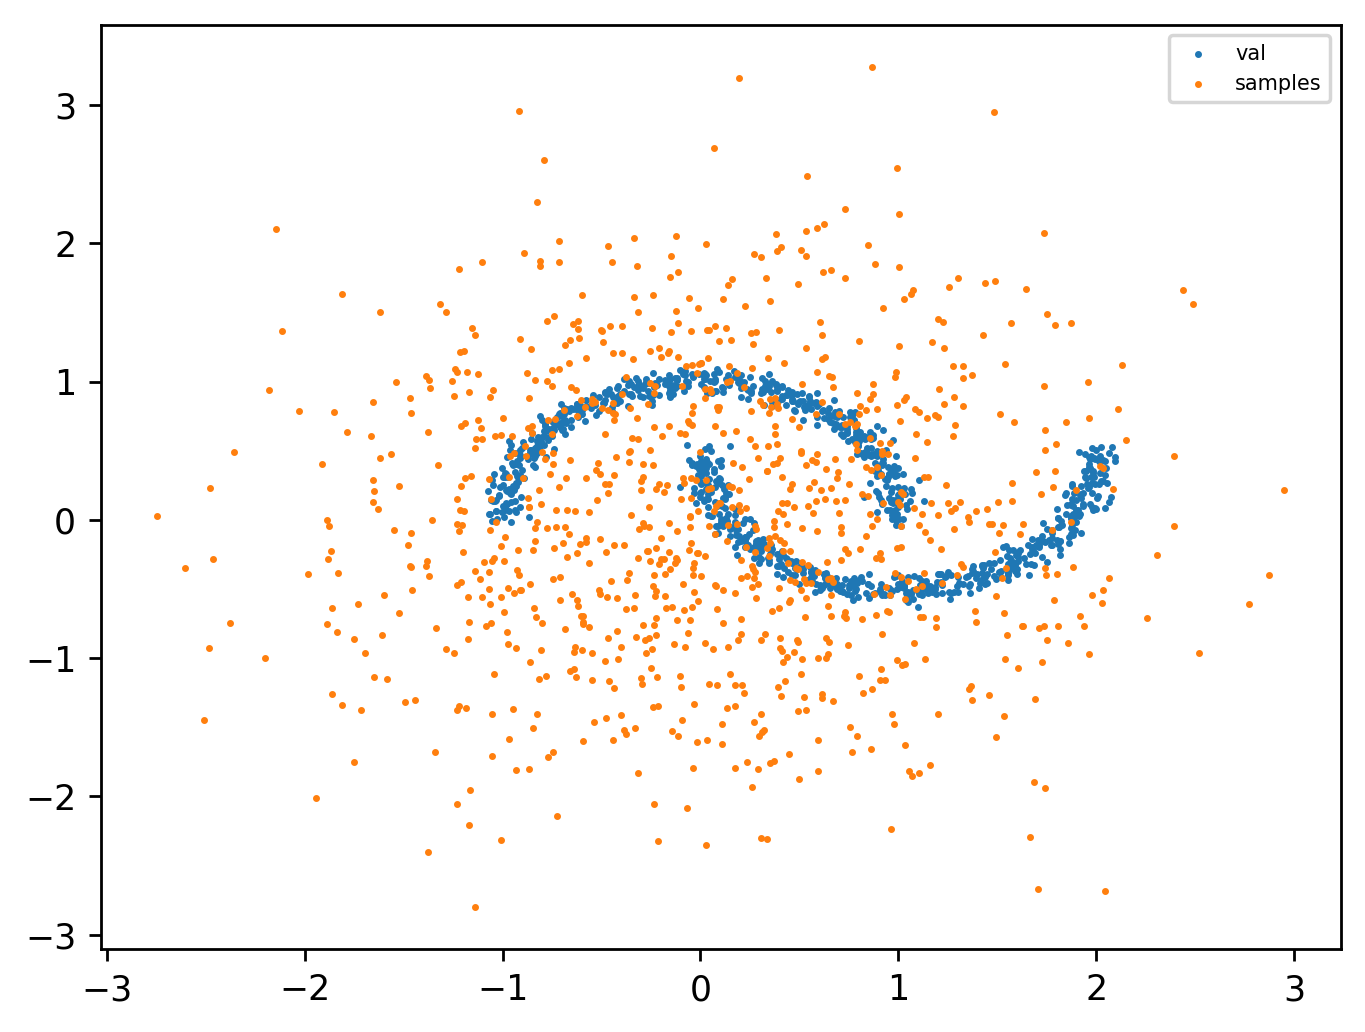

In [12]:
samples = model.generate((1000,))

plt.scatter(features[:, 0], features[:, 1], s=1, label="val")
plt.scatter(samples[:, 0], samples[:, 1], s=1, label="samples")
plt.legend()

torch.Size([10000, 2])


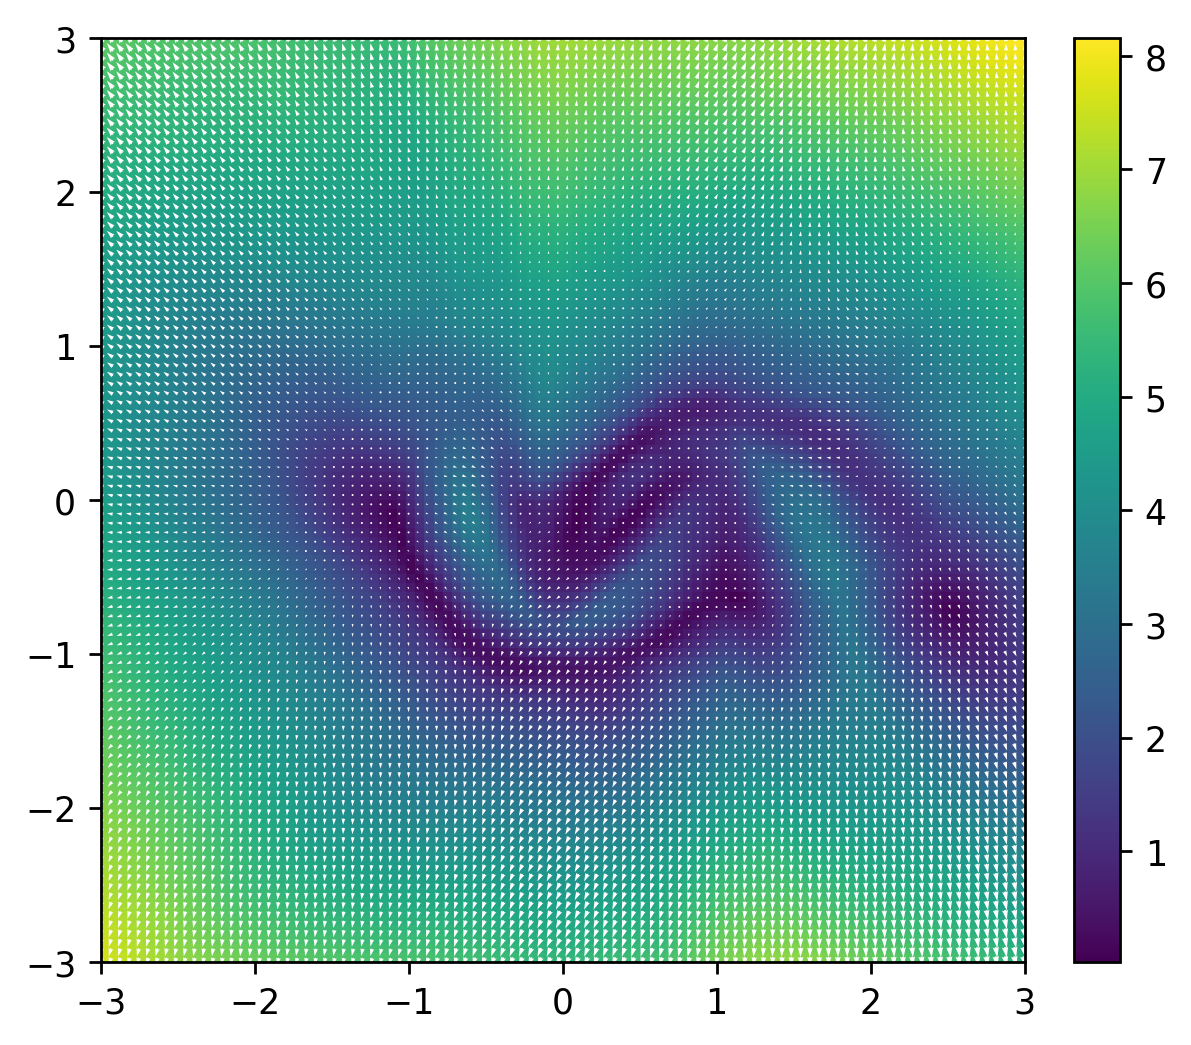

In [15]:
n, m = 100, 100
x = np.linspace(-3, 3, n)
y = np.linspace(-3, 3, m)

xx, yy = np.meshgrid(x, y)
x, y = xx.flatten(), yy.flatten()
xy = np.stack((x, y), axis=1)
xy = torch.from_numpy(xy).to(torch.float32).to(model.device)
print(xy.shape)
t = torch.zeros(xy.shape[0], 1, dtype=torch.float32).to(model.device)

v = model.net(xy, time=t)
norm = np.linalg.norm(v, axis=-1)

artist = plt.imshow(norm.reshape(n, m), extent=(x.min(), x.max(), y.min(), y.max()))
plt.colorbar(artist, fraction=0.046, pad=0.04)
plt.quiver(x, y, v[:, 0], v[:, 1], angles="xy", pivot="mid", color="white")

In [14]:
model.resample()

AttributeError: 'SingleTensorDataset' object has no attribute 'datasets'